In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame(pd.read_csv('C:/Users/Admin/Desktop/NFLX_project.csv'))

In [3]:
df.index[-1]

1008

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Text(0.5, 1.0, 'Netflix plot for the overall period')

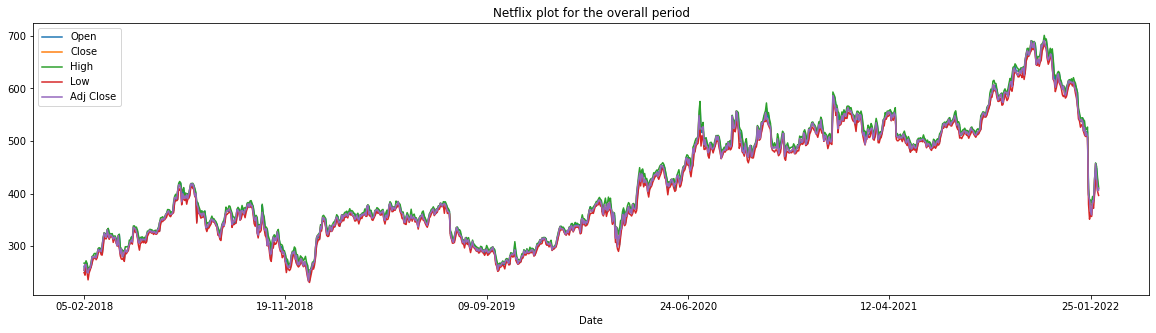

In [6]:
df[['Open','Close','High','Low', 'Adj Close']].plot(figsize=(20,5))
plt.title("Netflix plot for the overall period")

In [7]:
a=df.sort_values(by='High',ascending=False).head(5)
a['High']

Date
17-11-2021    700.989990
19-11-2021    694.159973
18-11-2021    691.739990
29-10-2021    690.969971
01-11-2021    689.969971
Name: High, dtype: float64

In [8]:
b=df.sort_values(by='Low').head(8)
b['Low']

Date
26-12-2018    231.229996
24-12-2018    233.679993
09-02-2018    236.110001
27-12-2018    240.100006
21-12-2018    241.289993
06-02-2018    245.000000
12-02-2018    249.000000
28-12-2018    249.800003
Name: Low, dtype: float64

In [9]:
import seaborn as sns

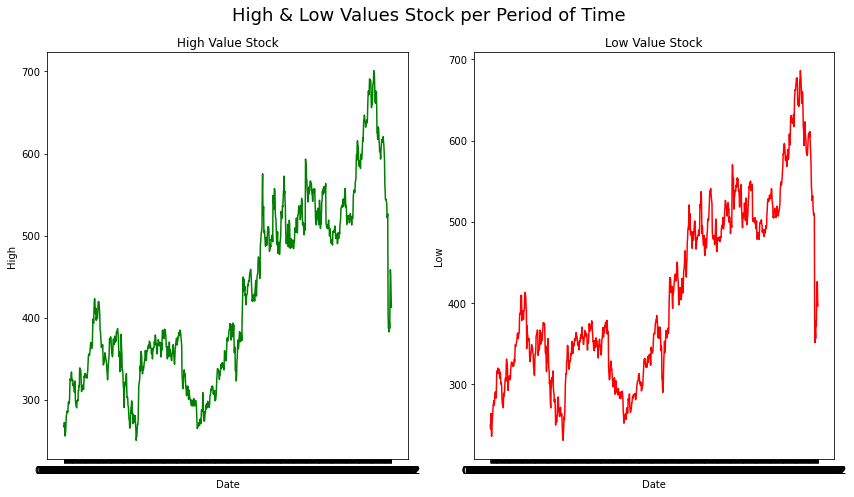

In [11]:
fig,axes= plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(12,7))
fig.suptitle('High & Low Values Stock per Period of Time',fontsize=18)
sns.lineplot(ax= axes[0], y=df['High'],x=df.index, color='green')
axes[0].set_title('High Value Stock')
sns.lineplot(ax= axes[1], y=df['Low'], x=df.index, color='red')
axes[1].set_title('Low Value Stock')
plt.tight_layout()
plt.show()

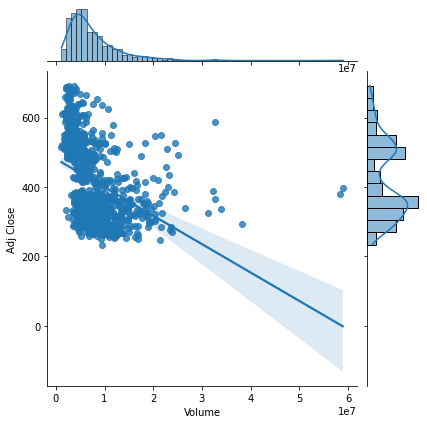

In [10]:
sns.jointplot(x='Volume',y='Adj Close', data=df,kind='reg')

In [11]:
df['Daily_returns'] = df['Adj Close'].pct_change()

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN
06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,0.045072
07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.004366
08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-0.054657
09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.002519


In [13]:
#Best stock of the Period
df[df['Daily_returns']==df['Daily_returns'].max()]['Daily_returns']

Date
20-01-2021    0.168543
Name: Daily_returns, dtype: float64

In [14]:
#Worst stock of the Period
df[df['Daily_returns']==df['Daily_returns'].min()]['Daily_returns']

Date
21-01-2022   -0.217905
Name: Daily_returns, dtype: float64

Text(0.5, 1.0, 'Stock Daily return over the period')

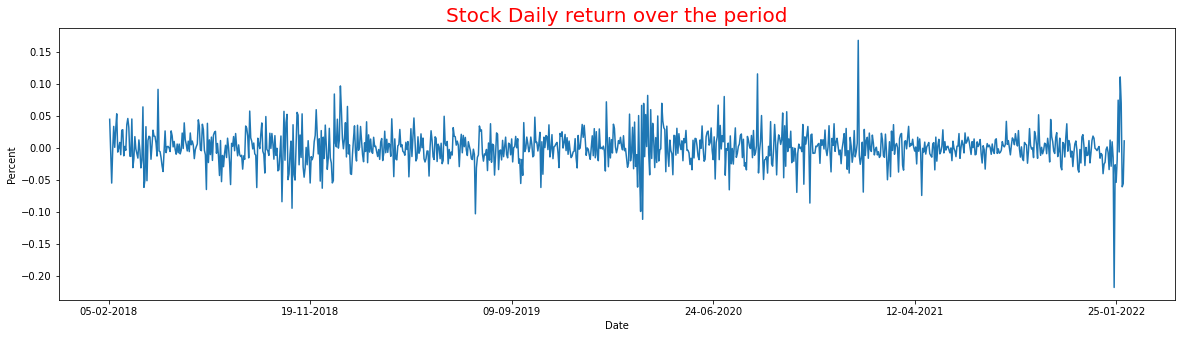

In [15]:
plt.figure(figsize=(20,5))
df['Daily_returns'].plot()
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title("Stock Daily return over the period",color='red', fontsize=20)

In [16]:
#Using the algorithms to predict the next 1 month of data.
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [17]:
X=df[['High','Low','Volume']]
Y=df['Adj Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [18]:
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [19]:
model=RandomForestRegressor(n_estimators=600,random_state=42,max_depth=10)
model.fit(X_train,Y_train)
predict=model.predict(X_test)
print(predict)
print(predict.shape)

[554.78775166 379.55337839 363.02308237 284.7248363  261.4712793
 434.59074826 255.51261714 512.4826034  315.6531758  349.63163441
 516.54843264 319.67809633 489.83247507 297.54524613 507.85299639
 497.23621583 290.66604376 547.7081808  337.40071214 268.10472572
 336.69319996 292.3354787  460.49280661 365.9609864  291.58194496
 501.49566388 495.76393785 297.27394027 353.36418578 367.23792541
 281.84431303 530.77159104 317.38370318 531.97686642 304.90967633
 521.38129276 340.72948015 376.74183125 507.28834158 634.31991739
 485.53263089 297.99334399 299.41712176 267.26999483 519.09024153
 286.06300069 293.538889   380.38619901 358.22770485 408.99329183
 368.94318387 607.76799587 481.83243871 516.19522779 364.62269588
 415.90966981 376.75568695 351.23094746 381.60532509 358.53165771
 291.57307829 504.23433031 487.83767957 412.33870456 326.81101354
 502.21842213 500.06099529 350.48165952 321.83961767 337.99365199
 656.74546149 351.49356802 266.52210869 268.61004983 429.31124939
 550.512138

In [20]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(Y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(Y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(Y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(Y_test, predict), 4))
print(f'Train Score : {model.score(X_train, Y_train) * 100:.2f}% and Test Score : {model.score(X_test, Y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - Y_test)
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 4.103
Mean Squared Error: 31.1527
Root Mean Squared Error: 5.5815
(R^2) Score: 0.9972
Train Score : 99.96% and Test Score : 99.72% using Random Tree Regressor.
Accuracy: 99.0 %.


In [27]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")

In [30]:
predictions

,Predictions
2022-04-02,553.993446
2022-04-03,379.236455
2022-04-04,361.306714
2022-04-05,282.410508
2022-04-06,261.039210
...,...
2023-01-25,546.876465
2023-01-26,410.793397
2023-01-27,278.817416
2023-01-28,406.707801


In [25]:
onemonth_df = pd.DataFrame(predictions[:28])
onemonth_df.to_csv("one-month-predictions.csv")

In [26]:
print(onemonth_df)

            Predictions
2022-04-02   553.993446
2022-04-03   379.236455
2022-04-04   361.306714
2022-04-05   282.410508
2022-04-06   261.039210
2022-04-07   434.170951
2022-04-08   264.968764
2022-04-09   517.964621
2022-04-10   315.709026
2022-04-11   348.768204
2022-04-12   520.242203
2022-04-13   321.322649
2022-04-14   489.871314
2022-04-15   298.258094
2022-04-16   510.720910
2022-04-17   503.124469
2022-04-18   288.717964
2022-04-19   549.495030
2022-04-20   337.511551
2022-04-21   270.222732
2022-04-22   338.596000
2022-04-23   294.188430
2022-04-24   462.496656
2022-04-25   369.025161
2022-04-26   290.204101
2022-04-27   502.958708
2022-04-28   498.440486
2022-04-29   297.049918


In [27]:
print(predictions)

            Predictions
2022-04-02   553.993446
2022-04-03   379.236455
2022-04-04   361.306714
2022-04-05   282.410508
2022-04-06   261.039210
...                 ...
2023-01-25   546.876465
2023-01-26   410.793397
2023-01-27   278.817416
2023-01-28   406.707801
2023-01-29   328.567433

[303 rows x 1 columns]


Buy price and date
   Unnamed: 0  Predictions
4  2022-04-06    261.03921 

Sell price and date
   Unnamed: 0  Predictions
0  2022-04-02   553.993446


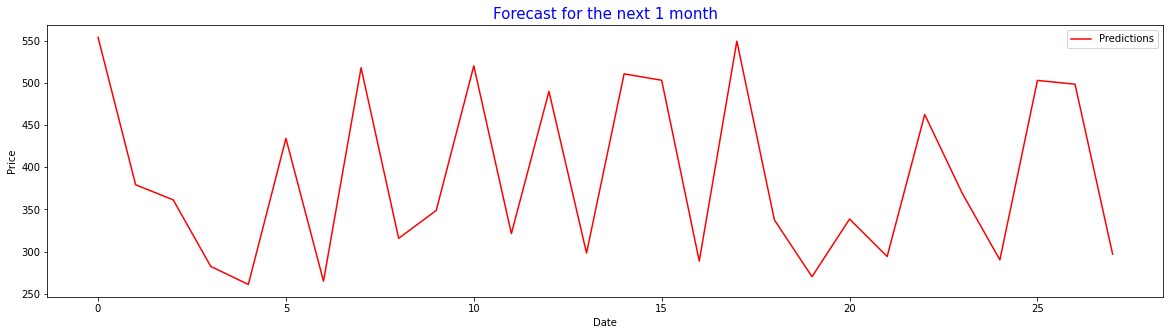

In [41]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy,'\n')
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(20, 5), color="red")
plt.title("Forecast for the next 1 month", size=15,color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()